## Simulation for particular Bc

Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
1 nl
Hermiticity check passed!
Symmetry checks passed!
2 nl
Hermiticity check passed!
Symmetry checks passed!
3 nl
Hermiticity check passed!
Symmetry checks passed!
4 nl
Hermiticity check passed!
Symmetry checks passed!
5 nl
Hermiticity check passed!
Symmetry checks passed!
6 nl
Hermiticity check passed!
Symmetry checks passed!
7 nl
Hermiticity check passed!
Symmetry checks passed!
8 nl
Hermiticity check passed!
Symmetry checks passed!
9 nl
Hermiticity check passed!
Symmetry checks passed!
10 nl

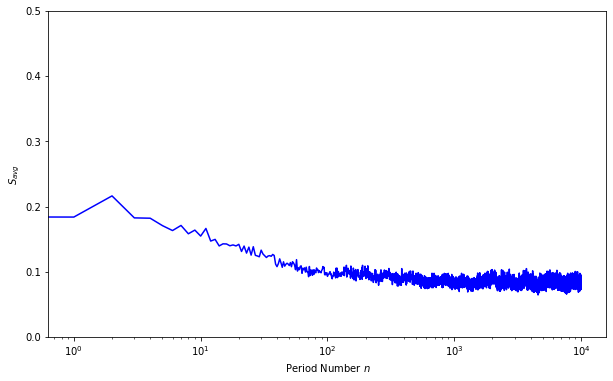

In [8]:
import random

import quspin as qs
import numpy as np
from scipy.linalg import expm
from quspin.operators import hamiltonian,exp_op
from quspin.operators import quantum_operator
import sys
# np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt



L = 6
Basis = qs.basis.spin_basis_1d(L,pauli=0)
# Jmean = np.pi * 10**6
delta_J = 0.4* np.pi * 10**6
Jstd = np.sqrt(delta_J)
J_xy = 2  * np.pi * 10**6
J_z = 2 * np.pi * 10**6

# Constants/Parameters
B_c =  0 #2*np.pi *300* 10**6
B_sat = 0
e_sat = 0.02
e_c = 0.02
T = 10**(-6)


def find_ones_indices(arr):
    return np.where(arr == 1)[0]






operator_dict = {
 # Pauli-X on qubit 0 with coefficient 1
    "1" : [["x", [[1,i+1] for i in range(L-1)]]]  # Pauli-X on qubit 1 with coefficient 1.0
}
operator_dict1 = {"1": [["x", [[1,0]]]] }

Usat = quantum_operator(operator_dict,  basis=Basis)
Ucen = quantum_operator(operator_dict1,  basis=Basis)

U_Sx_i = exp_op(Usat,a=-1j * np.pi * (1 - e_sat))
U_Sx_0 = exp_op(Ucen,a=-1j * np.pi * (1 - e_c))
U_pi = U_Sx_i.dot(U_Sx_0.get_mat())




ExpSz = {
    "1" : [["z", [[1,0]]]],
}
ExpSz0 = quantum_operator(ExpSz,  basis=Basis)
ExpSz0 = ExpSz0.toarray()

Exp_Sz0 = [["z",[[1,0]]]]
Exp_Sz1 = [["z",[[1,1]]]]
Exp_Sz2 = [["z",[[1,2]]]]
Exp_Sz3 = [["z",[[1,3]]]]
Exp_Sz4 = [["z",[[1,4]]]]
Exp_Sz5 = [["z",[[1,5]]]]

Sz0 = qs.operators.hamiltonian(Exp_Sz0,[],basis=Basis)
Sz1 = qs.operators.hamiltonian(Exp_Sz1,[],basis=Basis)
Sz2 = qs.operators.hamiltonian(Exp_Sz2,[],basis=Basis)
Sz3 = qs.operators.hamiltonian(Exp_Sz3,[],basis=Basis)
Sz4 = qs.operators.hamiltonian(Exp_Sz4,[],basis=Basis)
Sz5 = qs.operators.hamiltonian(Exp_Sz5,[],basis=Basis)

Sz1 = Sz1.toarray()
Sz2 = Sz2.toarray()
Sz3 = Sz3.toarray()
Sz4 = Sz4.toarray()
Sz5 = Sz5.toarray()





MexpSz = [[]]
# expSz = [[]]
MExp_val_sat=[[]]
for n in range(1,40,1):
    J_xy_list = [[J_xy + np.random.normal(0, delta_J), 0, i] for i in range(1, L)]
#     J_yx_list = [[J_xy + np.random.normal(0, delta_J), 0, i] for i in range(1, L)]
    J_z_list = [[J_z + np.random.normal(0, delta_J), 0, i] for i in range(1, L)]
    static = [["xx",J_xy_list],["yy",J_xy_list],["zz",J_z_list],["z",[[B_c,0]]]]

    H= hamiltonian(static,[],basis=Basis)
    U_H = exp_op(H,a= -1j*T)

    UF = U_pi@U_H.get_mat()

    state = np.zeros(Basis.Ns, dtype=complex)
    index = Basis.state_to_int("001010")
    state[index] = 1.0
    psi_p = state


    for i in range(10000):


        ExpSz0= (-1) * ExpSz0
        Sz1 = (-1)*Sz1
        Sz2 = (-1)*Sz2
        Sz3 = (-1)*Sz3
        Sz4 = (-1)*Sz4
        Sz5 = (-1)*Sz5

        # expSz[n-1].append((np.conj(psi_p.T)@ExpSz0@psi_p)[0,0])
        MexpSz[n-1].append((np.real(np.conj(psi_p.T)@ExpSz0@psi_p)[0,0]))
        s1 = np.real(np.conj(psi_p.T)@Sz1@psi_p)
        s2 = np.real(np.conj(psi_p.T)@Sz2@psi_p)
        s3 = np.real(np.conj(psi_p.T)@Sz3@psi_p)
        s4 = np.real(np.conj(psi_p.T)@Sz4@psi_p)
        s5 = np.real(np.conj(psi_p.T)@Sz5@psi_p)
        # print(s1,s2,s3,s4,s5)
        Savg = (abs(s1) + abs(s2) + abs(s3) + abs(s4) + abs(s5))/5

        MExp_val_sat[n-1].append(Savg)
        psi_p = UF@psi_p
    # expSz.append([])
    MexpSz.append([])
    MExp_val_sat.append([])
    print(n,"nl")

# expSz.remove([])
MexpSz.remove([])
MExp_val_sat.remove([])
# expSz = np.array(expSz)
MexpSz = np.array(MexpSz)
MExp_val_sat = np.array(MExp_val_sat)
# AvgexpSz = np.mean(expSz, axis=0)
AvgMexpSz = np.mean(MexpSz, axis=0)
AvgMExp_val_sat = np.mean(MExp_val_sat, axis=0)
period = [x for x in range(1,10001,1)]

x = period  # 100 points from 10^0 to 10^4
# y1 = AvgexpSz
y2 = abs(AvgMexpSz)
y3 = AvgMExp_val_sat

plt.figure(figsize = (10,6))
plt.plot(x, y3, color = "b")
# plt.plot(x, y3, color = "g")
plt.ylim(0, 0.5)
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlabel('Period Number $n$')
plt.ylabel('$S_{avg}$')
# plt.legend()
plt.show()

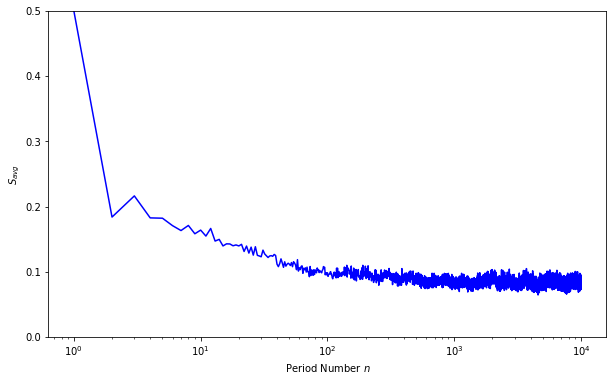

In [13]:
period = [x for x in range(1,10001,1)]
x = period
plt.figure(figsize = (10,6))
plt.plot(x, y3, color = "b")
# plt.plot(x, y3, color = "g")
plt.ylim(0, 0.5)
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlabel('Period Number $n$')
plt.ylabel('$S_{avg}$')
# plt.legend()
plt.show()

In [13]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

## Changing Bc values

In [ ]:
import random

import quspin as qs
import numpy as np
from scipy.linalg import expm
from quspin.operators import hamiltonian,exp_op
from quspin.operators import quantum_operator
import sys
# np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt


In [12]:
L = 6
Basis = qs.basis.spin_basis_1d(L,pauli=0)
Jmean = 2*np.pi * 10**6
delta_J = 0.4* np.pi * 10**6
J_xy = 2*np.pi * 10**6
J_z = 2*np.pi * 10**6

# Constants/Parameters
B_c = 2*np.pi *50* 10**6
B_sat = 0
e_sat = 0.05
e_c = 0.05
T = 10**(-6)

In [13]:
operator_dict = {
 # Pauli-X on qubit 0 with coefficient 1
    "1" : [["x", [[1,i+1] for i in range(L-1)]]]  # Pauli-X on qubit 1 with coefficient 1.0
}
operator_dict1 = {"1": [["x", [[1,0]]]] }

Usat = quantum_operator(operator_dict,  basis=Basis)
Ucen = quantum_operator(operator_dict1,  basis=Basis)

U_Sx_i = exp_op(Usat,a=-1j * np.pi * (1 - e_sat))
U_Sx_0 = exp_op(Ucen,a=-1j * np.pi * (1 - e_c))
U_pi = U_Sx_i.dot(U_Sx_0.get_mat())

Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!


In [14]:
Exp_Sz0 = [["z",[[1,0]]]]
Exp_Sz1 = [["z",[[1,1]]]]
Exp_Sz2 = [["z",[[1,2]]]]
Exp_Sz3 = [["z",[[1,3]]]]
Exp_Sz4 = [["z",[[1,4]]]]
Exp_Sz5 = [["z",[[1,5]]]]

Sz0 = qs.operators.hamiltonian(Exp_Sz0,[],basis=Basis)
Sz1 = qs.operators.hamiltonian(Exp_Sz1,[],basis=Basis)
Sz2 = qs.operators.hamiltonian(Exp_Sz2,[],basis=Basis)
Sz3 = qs.operators.hamiltonian(Exp_Sz3,[],basis=Basis)
Sz4 = qs.operators.hamiltonian(Exp_Sz4,[],basis=Basis)
Sz5 = qs.operators.hamiltonian(Exp_Sz5,[],basis=Basis)

Sz1 = Sz1.toarray()
Sz2 = Sz2.toarray()
Sz3 = Sz3.toarray()
Sz4 = Sz4.toarray()
Sz5 = Sz5.toarray()

Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!


In [15]:
ExpSz = {
    "1" : [["z", [[1,0]]]],   
}
ExpSz0 = quantum_operator(ExpSz,  basis=Basis)
ExpSz0 = ExpSz0.toarray()


Hermiticity check passed!
Symmetry checks passed!


Hermiticity check passed!
Symmetry checks passed!
B_c = 0, n = 1
Hermiticity check passed!
Symmetry checks passed!
B_c = 0, n = 2
Hermiticity check passed!
Symmetry checks passed!
B_c = 0, n = 3
Hermiticity check passed!
Symmetry checks passed!
B_c = 0, n = 4
Hermiticity check passed!
Symmetry checks passed!
B_c = 0, n = 5
Hermiticity check passed!
Symmetry checks passed!
B_c = 0, n = 6
Hermiticity check passed!
Symmetry checks passed!
B_c = 0, n = 7
Hermiticity check passed!
Symmetry checks passed!
B_c = 0, n = 8
Hermiticity check passed!
Symmetry checks passed!
B_c = 0, n = 9
Hermiticity check passed!
Symmetry checks passed!
B_c = 0, n = 10
Hermiticity check passed!
Symmetry checks passed!
B_c = 0, n = 11
Hermiticity check passed!
Symmetry checks passed!
B_c = 0, n = 12
Hermiticity check passed!
Symmetry checks passed!
B_c = 0, n = 13
Hermiticity check passed!
Symmetry checks passed!
B_c = 0, n = 14
Hermiticity check passed!
Symmetry checks passed!
B_c = 0, n = 15
Hermiticity check p

B_c = 314159265.35897934, n = 21
Hermiticity check passed!
Symmetry checks passed!
B_c = 314159265.35897934, n = 22
Hermiticity check passed!
Symmetry checks passed!
B_c = 314159265.35897934, n = 23
Hermiticity check passed!
Symmetry checks passed!
B_c = 314159265.35897934, n = 24
Hermiticity check passed!
Symmetry checks passed!
B_c = 314159265.35897934, n = 25
Hermiticity check passed!
Symmetry checks passed!
B_c = 314159265.35897934, n = 26
Hermiticity check passed!
Symmetry checks passed!
B_c = 314159265.35897934, n = 27
Hermiticity check passed!
Symmetry checks passed!
B_c = 314159265.35897934, n = 28
Hermiticity check passed!
Symmetry checks passed!
B_c = 314159265.35897934, n = 29
Hermiticity check passed!
Symmetry checks passed!
B_c = 314159265.35897934, n = 30
Hermiticity check passed!
Symmetry checks passed!
B_c = 314159265.35897934, n = 31
Hermiticity check passed!
Symmetry checks passed!
B_c = 314159265.35897934, n = 32
Hermiticity check passed!
Symmetry checks passed!
B_c 

B_c = 628318530.7179587, n = 22
Hermiticity check passed!
Symmetry checks passed!
B_c = 628318530.7179587, n = 23
Hermiticity check passed!
Symmetry checks passed!
B_c = 628318530.7179587, n = 24
Hermiticity check passed!
Symmetry checks passed!
B_c = 628318530.7179587, n = 25
Hermiticity check passed!
Symmetry checks passed!
B_c = 628318530.7179587, n = 26
Hermiticity check passed!
Symmetry checks passed!
B_c = 628318530.7179587, n = 27
Hermiticity check passed!
Symmetry checks passed!
B_c = 628318530.7179587, n = 28
Hermiticity check passed!
Symmetry checks passed!
B_c = 628318530.7179587, n = 29
Hermiticity check passed!
Symmetry checks passed!
B_c = 628318530.7179587, n = 30
Hermiticity check passed!
Symmetry checks passed!
B_c = 628318530.7179587, n = 31
Hermiticity check passed!
Symmetry checks passed!
B_c = 628318530.7179587, n = 32
Hermiticity check passed!
Symmetry checks passed!
B_c = 628318530.7179587, n = 33
Hermiticity check passed!
Symmetry checks passed!
B_c = 628318530.

B_c = 1884955592.1538758, n = 23
Hermiticity check passed!
Symmetry checks passed!
B_c = 1884955592.1538758, n = 24
Hermiticity check passed!
Symmetry checks passed!
B_c = 1884955592.1538758, n = 25
Hermiticity check passed!
Symmetry checks passed!
B_c = 1884955592.1538758, n = 26
Hermiticity check passed!
Symmetry checks passed!
B_c = 1884955592.1538758, n = 27
Hermiticity check passed!
Symmetry checks passed!
B_c = 1884955592.1538758, n = 28
Hermiticity check passed!
Symmetry checks passed!
B_c = 1884955592.1538758, n = 29
Hermiticity check passed!
Symmetry checks passed!
B_c = 1884955592.1538758, n = 30
Hermiticity check passed!
Symmetry checks passed!
B_c = 1884955592.1538758, n = 31
Hermiticity check passed!
Symmetry checks passed!
B_c = 1884955592.1538758, n = 32
Hermiticity check passed!
Symmetry checks passed!
B_c = 1884955592.1538758, n = 33
Hermiticity check passed!
Symmetry checks passed!
B_c = 1884955592.1538758, n = 34
Hermiticity check passed!
Symmetry checks passed!
B_c 

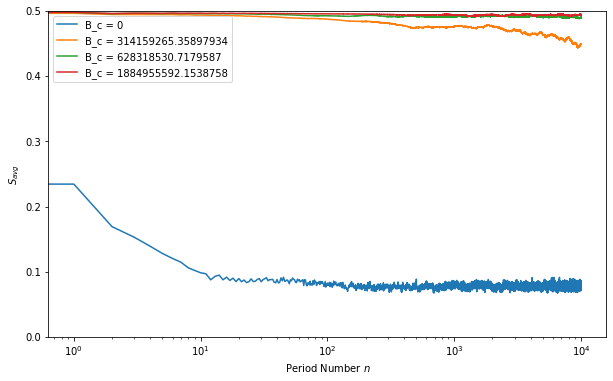

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define your B_c values
B_c_values = [0, 2*np.pi *50* 10**6, 2*np.pi *100* 10**6,2*np.pi *300*10**6]# Example values

plt.figure(figsize=(10, 6))

for B_c in B_c_values:
    expSz = [[]]
    MexpSz = [[]]
    MExp_val_sat = [[]]
    
    for n in range(1, 100, 1):
        J_xy_list = [[J_xy + np.random.normal(0, delta_J), 0, i] for i in range(1, L)]
        J_z_list = [[J_z + np.random.normal(0, delta_J), 0, i] for i in range(1, L)]
        static = [["xx", J_xy_list], ["yy", J_xy_list], ["zz", J_z_list], ["z", [[B_c, 0]]]]

        H = hamiltonian(static, [], basis=Basis)
        U_H = exp_op(H, a=-1j*T)

        UF = U_pi @ U_H.get_mat()

        state = np.zeros(Basis.Ns, dtype=complex)
        index = Basis.state_to_int("001010")
        state[index] = 1.0
        psi_p = state

        expSz.append([])
        MexpSz.append([])
        MExp_val_sat.append([])

        for i in range(10000):
            psi_p = UF @ psi_p
            ExpSz0 = (-1) * ExpSz0
            Sz1 = (-1)*Sz1
            Sz2 = (-1)*Sz2
            Sz3 = (-1)*Sz3
            Sz4 = (-1)*Sz4
            Sz5 = (-1)*Sz5
            expSz[n - 1].append((np.conj(psi_p.T) @ ExpSz0 @ psi_p)[0, 0])
            MexpSz[n - 1].append((np.real(np.conj(psi_p.T) @ ExpSz0 @ psi_p)[0, 0]))
            s1 = np.real(np.conj(psi_p.T)@Sz1@psi_p)
            s2 = np.real(np.conj(psi_p.T)@Sz2@psi_p)
            s3 = np.real(np.conj(psi_p.T)@Sz3@psi_p)
            s4 = np.real(np.conj(psi_p.T)@Sz4@psi_p)
            s5 = np.real(np.conj(psi_p.T)@Sz5@psi_p)
            Savg = (abs(s1) + abs(s2) + abs(s3) + abs(s4) + abs(s5))/5
            MExp_val_sat[n-1].append(Savg)

        print(f"B_c = {B_c}, n = {n}")

    expSz.remove([])
    MexpSz.remove([])
    MExp_val_sat.remove([])
    expSz = np.array(expSz)
    MexpSz = np.array(MexpSz)
    MExp_val_sat = np.array(MExp_val_sat)
    AvgexpSz = np.mean(expSz, axis=0)
    AvgMexpSz = abs(np.mean(MexpSz, axis=0))
    AvgMExp_val_sat = np.mean(MExp_val_sat, axis=0)    
    period = [x for x in range(10000)]

    plt.plot(period, AvgMExp_val_sat, label=f"B_c = {B_c}")

plt.ylim(0, 0.5)
plt.xscale('log')
plt.xlabel('Period Number $n$')
plt.ylabel('$S_{avg}$')
plt.legend()
plt.show()


## Changing J values

In [18]:
L = 6
Basis = qs.basis.spin_basis_1d(L,pauli=0)
Jmean = 2*np.pi * 10**6
delta_J = 0.4* np.pi * 10**6
J_xy = 2*np.pi * 10**6
J_z = 2*np.pi * 10**6

# Constants/Parameters
B_c = 2*np.pi *300* 10**6
B_sat = 0
e_sat = 0.05
e_c = 0.05
T = 10**(-6)

In [19]:
operator_dict = {
 # Pauli-X on qubit 0 with coefficient 1
    "1" : [["x", [[1,i+1] for i in range(L-1)]]]  # Pauli-X on qubit 1 with coefficient 1.0
}
operator_dict1 = {"1": [["x", [[1,0]]]] }

Usat = quantum_operator(operator_dict,  basis=Basis)
Ucen = quantum_operator(operator_dict1,  basis=Basis)

U_Sx_i = exp_op(Usat,a=-1j * np.pi * (1 - e_sat))
U_Sx_0 = exp_op(Ucen,a=-1j * np.pi * (1 - e_c))
U_pi = U_Sx_i.dot(U_Sx_0.get_mat())

Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!


In [20]:
ExpSz = {
    "1" : [["z", [[1,0]]]],   
}
ExpSz0 = quantum_operator(ExpSz,  basis=Basis)
ExpSz0 = ExpSz0.toarray()

Hermiticity check passed!
Symmetry checks passed!


In [22]:
Exp_Sz0 = [["z",[[1,0]]]]
Exp_Sz1 = [["z",[[1,1]]]]
Exp_Sz2 = [["z",[[1,2]]]]
Exp_Sz3 = [["z",[[1,3]]]]
Exp_Sz4 = [["z",[[1,4]]]]
Exp_Sz5 = [["z",[[1,5]]]]

Sz0 = qs.operators.hamiltonian(Exp_Sz0,[],basis=Basis)
Sz1 = qs.operators.hamiltonian(Exp_Sz1,[],basis=Basis)
Sz2 = qs.operators.hamiltonian(Exp_Sz2,[],basis=Basis)
Sz3 = qs.operators.hamiltonian(Exp_Sz3,[],basis=Basis)
Sz4 = qs.operators.hamiltonian(Exp_Sz4,[],basis=Basis)
Sz5 = qs.operators.hamiltonian(Exp_Sz5,[],basis=Basis)



Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!


Hermiticity check passed!
Symmetry checks passed!
J = 0, n = 1
Hermiticity check passed!
Symmetry checks passed!
J = 0, n = 2
Hermiticity check passed!
Symmetry checks passed!
J = 0, n = 3
Hermiticity check passed!
Symmetry checks passed!
J = 0, n = 4
Hermiticity check passed!
Symmetry checks passed!
J = 0, n = 5
Hermiticity check passed!
Symmetry checks passed!
J = 0, n = 6
Hermiticity check passed!
Symmetry checks passed!
J = 0, n = 7
Hermiticity check passed!
Symmetry checks passed!
J = 0, n = 8
Hermiticity check passed!
Symmetry checks passed!
J = 0, n = 9
Hermiticity check passed!
Symmetry checks passed!
J = 0, n = 10
Hermiticity check passed!
Symmetry checks passed!
J = 0, n = 11
Hermiticity check passed!
Symmetry checks passed!
J = 0, n = 12
Hermiticity check passed!
Symmetry checks passed!
J = 0, n = 13
Hermiticity check passed!
Symmetry checks passed!
J = 0, n = 14
Hermiticity check passed!
Symmetry checks passed!
J = 0, n = 15
Hermiticity check passed!
Symmetry checks passed!

J = 6283185.307179586, n = 24
Hermiticity check passed!
Symmetry checks passed!
J = 6283185.307179586, n = 25
Hermiticity check passed!
Symmetry checks passed!
J = 6283185.307179586, n = 26
Hermiticity check passed!
Symmetry checks passed!
J = 6283185.307179586, n = 27
Hermiticity check passed!
Symmetry checks passed!
J = 6283185.307179586, n = 28
Hermiticity check passed!
Symmetry checks passed!
J = 6283185.307179586, n = 29
Hermiticity check passed!
Symmetry checks passed!
J = 6283185.307179586, n = 30
Hermiticity check passed!
Symmetry checks passed!
J = 6283185.307179586, n = 31
Hermiticity check passed!
Symmetry checks passed!
J = 6283185.307179586, n = 32
Hermiticity check passed!
Symmetry checks passed!
J = 6283185.307179586, n = 33
Hermiticity check passed!
Symmetry checks passed!
J = 6283185.307179586, n = 34
Hermiticity check passed!
Symmetry checks passed!
J = 6283185.307179586, n = 35
Hermiticity check passed!
Symmetry checks passed!
J = 6283185.307179586, n = 36
Hermiticit

J = 18849555.92153876, n = 28
Hermiticity check passed!
Symmetry checks passed!
J = 18849555.92153876, n = 29
Hermiticity check passed!
Symmetry checks passed!
J = 18849555.92153876, n = 30
Hermiticity check passed!
Symmetry checks passed!
J = 18849555.92153876, n = 31
Hermiticity check passed!
Symmetry checks passed!
J = 18849555.92153876, n = 32
Hermiticity check passed!
Symmetry checks passed!
J = 18849555.92153876, n = 33
Hermiticity check passed!
Symmetry checks passed!
J = 18849555.92153876, n = 34
Hermiticity check passed!
Symmetry checks passed!
J = 18849555.92153876, n = 35
Hermiticity check passed!
Symmetry checks passed!
J = 18849555.92153876, n = 36
Hermiticity check passed!
Symmetry checks passed!
J = 18849555.92153876, n = 37
Hermiticity check passed!
Symmetry checks passed!
J = 18849555.92153876, n = 38
Hermiticity check passed!
Symmetry checks passed!
J = 18849555.92153876, n = 39
Hermiticity check passed!
Symmetry checks passed!
J = 18849555.92153876, n = 40
Hermiticit

J = 31415926.535897933, n = 32
Hermiticity check passed!
Symmetry checks passed!
J = 31415926.535897933, n = 33
Hermiticity check passed!
Symmetry checks passed!
J = 31415926.535897933, n = 34
Hermiticity check passed!
Symmetry checks passed!
J = 31415926.535897933, n = 35
Hermiticity check passed!
Symmetry checks passed!
J = 31415926.535897933, n = 36
Hermiticity check passed!
Symmetry checks passed!
J = 31415926.535897933, n = 37
Hermiticity check passed!
Symmetry checks passed!
J = 31415926.535897933, n = 38
Hermiticity check passed!
Symmetry checks passed!
J = 31415926.535897933, n = 39
Hermiticity check passed!
Symmetry checks passed!
J = 31415926.535897933, n = 40
Hermiticity check passed!
Symmetry checks passed!
J = 31415926.535897933, n = 41
Hermiticity check passed!
Symmetry checks passed!
J = 31415926.535897933, n = 42
Hermiticity check passed!
Symmetry checks passed!
J = 31415926.535897933, n = 43
Hermiticity check passed!
Symmetry checks passed!
J = 31415926.535897933, n = 

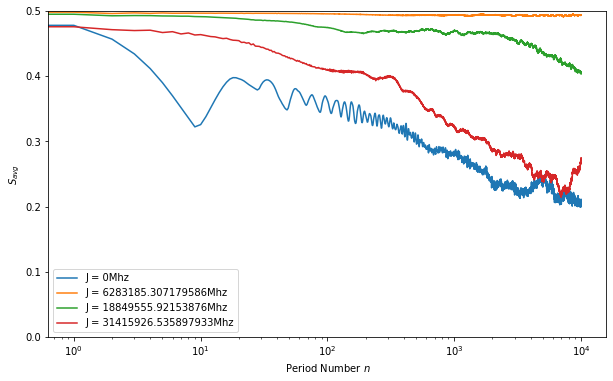

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define your B_c values
Jvalues = [0, 2*np.pi * 10**6, 2*np.pi *3* 10**6,2*np.pi *5*10**6]# Example values

plt.figure(figsize=(10, 6))

for J in Jvalues:
    expSz = [[]]
    MexpSz = [[]]
    MExp_val_sat=[[]]
    
    
    for n in range(1, 100, 1):
        J_xy_list = [[J + np.random.normal(0, delta_J), 0, i] for i in range(1, L)]
        J_z_list = [[J + np.random.normal(0, delta_J), 0, i] for i in range(1, L)]
        static = [["xx", J_xy_list], ["yy", J_xy_list], ["zz", J_z_list], ["z", [[B_c, 0]]]]

        H = hamiltonian(static, [], basis=Basis)
        U_H = exp_op(H, a=-1j*T)

        UF = U_pi @ U_H.get_mat()

        state = np.zeros(Basis.Ns, dtype=complex)
        index = Basis.state_to_int("001010")
        state[index] = 1.0
        psi_p = state

        expSz.append([])
        MexpSz.append([])
        MExp_val_sat.append([])

        for i in range(10000):
            psi_p = UF @ psi_p
            ExpSz0 = (-1) * ExpSz0
            expSz[n - 1].append((np.conj(psi_p.T) @ ExpSz0 @ psi_p)[0, 0])
            MexpSz[n - 1].append((np.real(np.conj(psi_p.T) @ ExpSz0 @ psi_p)[0, 0]))
            s1 = Sz1.expt_value(psi_p)
            s2 = Sz2.expt_value(psi_p)
            s3 = Sz3.expt_value(psi_p)
            s4 = Sz4.expt_value(psi_p)
            s5 = Sz5.expt_value(psi_p)
            Savg = (abs(s1) + abs(s2) + abs(s3) + abs(s4) + abs(s5))/5
            MExp_val_sat[n-1].append(Savg)

        print(f"J = {J}, n = {n}")

    expSz.remove([])
    MexpSz.remove([])
    MExp_val_sat.remove([])
    expSz = np.array(expSz)
    MexpSz = np.array(MexpSz)
    MExp_val_sat = np.array(MExp_val_sat)
    AvgexpSz = np.mean(expSz, axis=0)
    AvgMexpSz = abs(np.mean(MexpSz, axis=0))
    AvgMExp_val_sat = abs(np.mean(MExp_val_sat, axis=0))
    period = [x for x in range(10000)]

    plt.plot(period, AvgMexpSz, label=f"J = {J}Mhz")

plt.ylim(0, 0.5)
plt.xscale('log')
plt.xlabel('Period Number $n$')
plt.ylabel('$S_{avg}$')
plt.legend()
plt.show()
